TypeError: Image data of dtype object cannot be converted to float

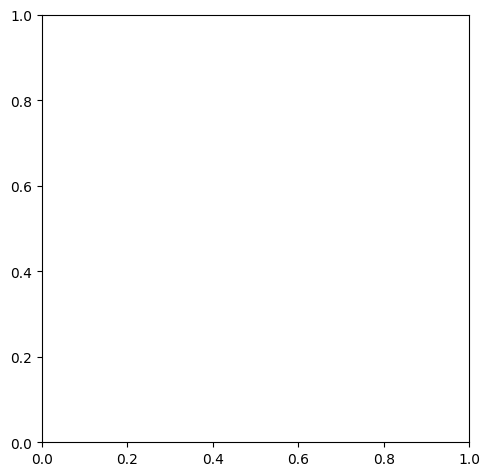

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5))

img_c1 = cv2.imread("left01.jpg")
plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
img_c2 = np.fft.fft2(img_c1) #2D fast fourier transform
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
phase = np.angle(img_c2)
magnitude = np.abs(img_c2)



# plt.subplot(152), plt.imshow(img_c2, "gray"), plt.title("Processed Image")
# img_c3 = np.fft.fftshift(img_c2)
# img_c4 = np.fft.ifftshift(img_c3)
# img_c5 = np.fft.ifft2(img_c4)

# plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
# plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")


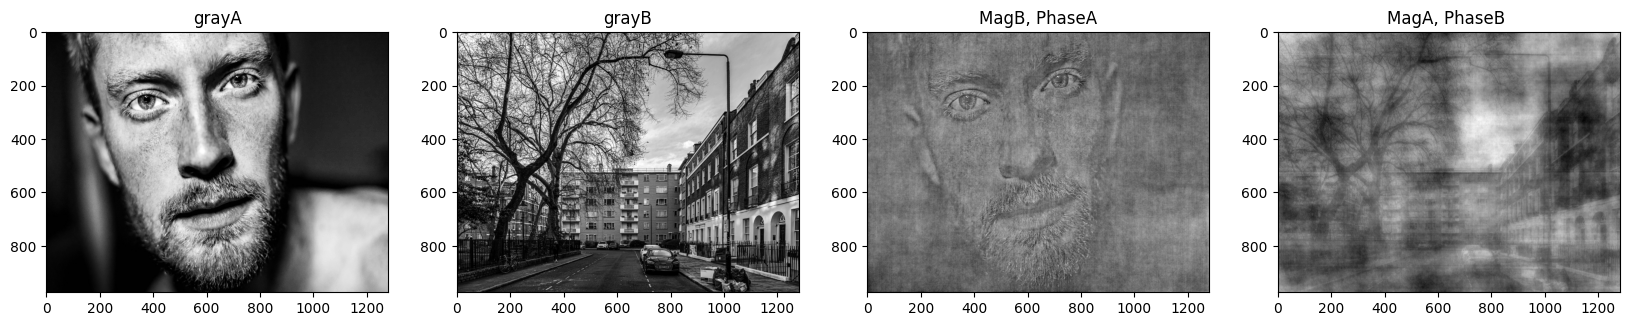

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

grayA = cv2.imread("grayA3.jpeg", 0)

grayB = cv2.imread("grayA4.jpeg", 0)

grayA = cv2.resize(grayA, dsize = [grayB.shape[1], grayB.shape[0]])

plt.figure(figsize=(6.4*4, 4.8*4))


f = np.fft.fft2(grayA)
f2 = np.fft.fft2(grayB)

phase_f = np.exp(1j*np.angle(f))
mag_f = np.abs(f)

mag_f2 = np.abs(f2)
phase_f2 = np.exp(1j*np.angle(f2))
# fshift1 = np.fft.fftshift(f)
# phase_spectrumA = np.angle(fshift1)
# magnitude_spectrumA = 20*np.log(np.abs(fshift1))
plt.subplot(151), plt.imshow(grayA, cmap = "gray"), plt.title("grayA")
plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")


# fshift2 = np.fft.fftshift(f2)
# phase_spectrumB = np.angle(fshift2)
# magnitude_spectrumB = 20*np.log(np.abs(fshift2))

combined1 = np.multiply(mag_f2, phase_f)
imgCombined1 = np.real(np.fft.ifft2(combined1))
plt.subplot(153), plt.imshow(imgCombined1, cmap ="gray"), plt.title("MagB, PhaseA")

combined2 = np.multiply(mag_f, phase_f2)
imgCombined2 = np.real(np.fft.ifft2(combined2))
plt.subplot(154), plt.imshow(imgCombined2, cmap="gray"), plt.title("MagA, PhaseB ")


# imgCombined = np.abs(imgCombined)

# plt.imshow(imgCombined, cmap='gray')
plt.show()

In [ ]:
print(grayA.shape)
print(grayB.shape)

(974, 1280)
(974, 1280)


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_2D(first_image_path):
    
    first_image = cv2.imread(first_image_path, 0)  #first image as gray scale

    first_image = cv2.resize(first_image, dsize = [1400, 1400])

    first_image_magnitude, first_image_angle = magnitude_angle(first_image)

    return first_image_magnitude, first_image_angle


def magnitude_angle(image):

    image_fourier = np.fft.fft2(image)
    image_fourier = np.fft.fftshift(image_fourier)
    magnitude = np.abs(image_fourier)
    # phase = np.exp(1j*np.angle(image_fourier))
    angle = np.angle(image_fourier)
    
    return magnitude, angle
    
def construct_image(magnitude, angle, id):

    combined = np.multiply(magnitude, np.exp(np.multiply(1j,angle)))
    combined = np.fft.ifftshift(combined)
    image_combined = np.abs(np.fft.ifft2(combined))
    if id:
        image_combined = cv2.equalizeHist(image_combined.astype(np.uint8))

    cv2.imwrite('../backend/files/result.png', image_combined)
    return image_combined

def points(x_percentage, y_percentage, width, height):
    coordinates = []

    x_minimum = (x_percentage/100)*1400
    coordinates.append(x_minimum)
    x_maximum = ((x_percentage/100)*1400) + ((width/100)*1400)
    coordinates.append(x_maximum)

    y_minimum = (y_percentage/100)*1400
    coordinates.append(y_minimum)
    y_maximum = ((y_percentage/100)*1400) + ((height/100)*1400)
    coordinates.append(y_maximum)

    return coordinates

def crop_2d_img(image, coordinates):
    
    max_height= image.shape[0]-1
    cutted_img = np.zeros_like(image)
 
    for x in range(int(coordinates[0]),int(coordinates[1])):
        for y in range(int(coordinates[2]),int(coordinates[3])):
            cutted_img[max_height-y,x] = image[max_height-y,x]
    return cutted_img

def plot_magnitude_phase(mag, angle):
    phase = np.exp(1j*angle)
    # db.magnitude['mag'+str(counter.imgId)] = mag
    # db.angle['phase'+str(counter.imgId)] = angle
    mag = np.fft.ifftshift(mag)
    inverse_mag = np.fft.ifft2(mag)
    phase = np.fft.ifftshift(phase)
    inverse_phase = np.fft.ifft2(phase)
    # plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
    cv2.imwrite('../backend/files/mag.png', np.abs(np.log(inverse_mag)))
    # plt.clf()
    # plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
    cv2.imwrite('../backend/files/phase.png', np.abs(np.log(inverse_phase)))

# def plot_magnitude_phase(image_path):
#     mag, angle = fourier_2D(image_path)
#     phase = np.exp(1j*angle)
#     # db.magnitude['mag'+str(counter.imgId)] = mag
#     # db.phase['phase'+str(counter.imgId)] = phase
#     inverse_mag = np.fft.ifft2(mag)
#     inverse_phase = np.fft.ifft2(phase)
#     plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
#     plt.savefig('./files/images/mag'+str(counter.imgId))
#     plt.clf()
#     plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
#     plt.savefig('./files/images/phase'+str(counter.imgId))    


In [13]:
plt.figure(figsize=(6.4*4, 4.8*4))

grayA = "anwar.jpeg"

grayB = "zeyad.jpeg"



first_mag, first_phase = fourier_2D (grayA)

image_fm_sp = construct_image(first_mag)
image_sm_fp = construct_image(first_phase)

# plt.subplot(151), plt.imshow(grayA, cmap ="gray"), plt.title("grayA")
# plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")
plt.subplot(153), plt.imshow(image_fm_sp, cmap ="gray"), plt.title("MagAnwar, PhaseZeyad")
plt.subplot(154), plt.imshow(image_sm_fp, cmap ="gray"), plt.title("MagZeyad, PhaseAnwar")





TypeError: construct_image() missing 2 required positional arguments: 'angle' and 'id'

<Figure size 2560x1920 with 0 Axes>

In [ ]:
plt.figure(figsize=(6.4*4, 4.8*4))

grayA = "momen.jpeg"

grayB = "raouf.jpeg"



first_mag, first_phase, second_mag, second_phase = fourier_2D (grayA, grayB)

image_fm_sp = construct_image(first_mag, second_phase)
image_sm_fp = construct_image(second_mag, first_phase)

# plt.subplot(151), plt.imshow(grayA, cmap ="gray"), plt.title("grayA")
# plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")
plt.subplot(153), plt.imshow(image_fm_sp, cmap ="gray"), plt.title("MagMomen, PhaseRaouf")
plt.subplot(154), plt.imshow(image_sm_fp, cmap ="gray"), plt.title("MagRaouf, PhaseMomen")

TypeError: fourier_2D() takes 1 positional argument but 2 were given

<Figure size 2560x1920 with 0 Axes>

In [14]:
plt.figure(figsize=(6.4*4, 4.8*4))

grayA = "mazen.jpeg"

grayB = "saad.jpeg"



first_mag, first_phase, second_mag, second_phase = fourier_2D (grayA, grayB)

image_fm_sp = construct_image(first_mag, second_phase)
image_sm_fp = construct_image(second_mag, first_phase)

# plt.subplot(151), plt.imshow(grayA, cmap ="gray"), plt.title("grayA")
# plt.subplot(152), plt.imshow(grayB, cmap ="gray"), plt.title("grayB")
plt.subplot(153), plt.imshow(image_fm_sp, cmap ="gray"), plt.title("MagMazen, PhaseSaad")
plt.subplot(154), plt.imshow(image_sm_fp, cmap ="gray"), plt.title("MagSaad, PhaseMazen")

TypeError: fourier_2D() takes 1 positional argument but 2 were given

<Figure size 2560x1920 with 0 Axes>

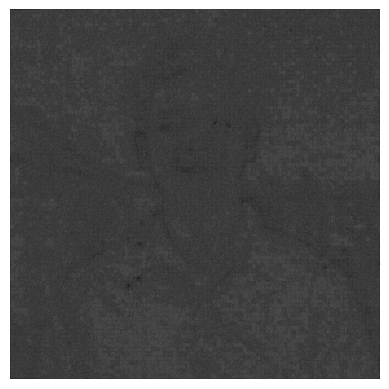

In [7]:
grayA = "mazen.jpeg"
# grayA = cv2.imread(grayA, 0)

mag, angle =  fourier_2D (grayA)

arr = points (50, 50, 40, 40)

new_mag = crop_2d_img(mag, arr)
new_angle = crop_2d_img(angle, arr)
new_image1 = construct_image(new_mag, angle, 0)
new_image2 = construct_image(mag, new_angle, 1)
new_image3 = construct_image(new_mag, new_angle, 1)

phase = np.exp(1j*angle)
inverse_mag = np.fft.ifft2(mag)
inverse_phase = np.fft.ifft2(phase)
plt.axis('off')
plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
plt.savefig('../backend/files/mag.png')
plt.clf()
plt.axis('off')
plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")
plt.savefig('../backend/files/phase.png', bbox_inches= 'tight', pad_inches = 0)

In [6]:


# plot_magnitude_phase(mag, angle)
phase = np.exp(1j*angle)
# db.magnitude['mag'+str(counter.imgId)] = mag
# db.angle['phase'+str(counter.imgId)] = angle
mag = np.fft.ifftshift(mag)
inverse_mag = np.fft.ifft2(mag)
phase = np.fft.ifftshift(phase)
inverse_phase = np.abs(np.log(np.fft.ifft2(phase)))
image_combined = cv2.equalizeHist(inverse_phase.astype(np.uint8))
# plt.imshow(np.abs(np.log(inverse_mag)), cmap="gray")
def full_frame(width=None, height=None):
    import matplotlib as mpl
    mpl.rcParams['savefig.pad_inches'] = 0 
    figsize = None if width is None else (width, height)
    fig = plt.figure(figsize=figsize)
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.autoscale(tight=True)

cv2.imwrite('../backend/files/mag.png', np.abs(inverse_mag))
# plt.clf()
# plt.figure(figsize=(20, 5))
# plt.tight_layout()
# plt.gca().set_position((1, 1, 1, 1))
full_frame()
# plt.autoscale()
# plt.axes(frameon=False)
# plt.axis('off')
plt.imshow(np.abs(np.log(inverse_phase)), cmap="gray")

# plt.rcParams['savefig.pad_inches' : '0', "savefig.figsize" : ""]
plt.savefig('../backend/files/phase.png')
print(np.abs(np.log(inverse_phase)).shape)
# new_image1 = cv2.equalizeHist(new_image1.astype(np.uint8))
# clahe = cv2.createCLAHE(clipLimit=0, tileGridSize=(2,2))
# new_image1 = clahe.apply(new_image1)

# new_image2 = cv2.equalizeHist(new_image2.astype(np.uint8))

# plt.imshow(new_image, cmap="gray")
plt.figure(figsize=(20, 5))
plt.subplot(153)
plt.imshow(new_image1, cmap="gray")
plt.title("New mag, Phase")
plt.subplot(154)
plt.imshow(new_image2, cmap="gray")
plt.title("Mag, New phase")
plt.subplot(155)
plt.imshow(new_image3, cmap="gray")
plt.title("New mag, New phase")
# import pylab
# pylab.figure(figsize=(8,8))
# pylab.subplot(2,2,1), pylab.imshow(new_image1, cmap='gray'), pylab.title('Original Image', size=20)
# pylab.subplot(2,2,2), pylab.imshow(new_image2, cmap='gray')
# pylab.title('Img Magnitude', size=20)
# pylab.subplot(2,2,3), pylab.imshow(img_phase.real, cmap='gray')
# pylab.title('Img Phase', size=20)
# pylab.subplot(2,2,4), pylab.imshow(np.abs(reconstructed_img), cmap='gray')
# pylab.title('Reconstructed Image', size=20)
# pylab.show()






NameError: name 'angle' is not defined